**Matplotlib mtcars dataset, linear regression**
**mtcars** is an iconic dataset, well known among data scientists, and frequently used for training. It consists of a data frame with 32 observations (rows) on 11 numeric variables (columns). The data was extracted from the 1974 *Motor Trend US* magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models).  

In this lesson, we will:
- load an image with the **IPython** module
- load **mtcars** as a **csv** file
- **split** the data from one column into two columns using **lambda**
- **rename**, **drop** and **move** columns
- make a **histogram** of frequencies
- **group** data for comparison in **horizontal bar chart** and in **scatter plot**
- plot a **linear regression line** through the scatter plot dots

In [42]:
# import numpy, pandas, matplotlib and IPython Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

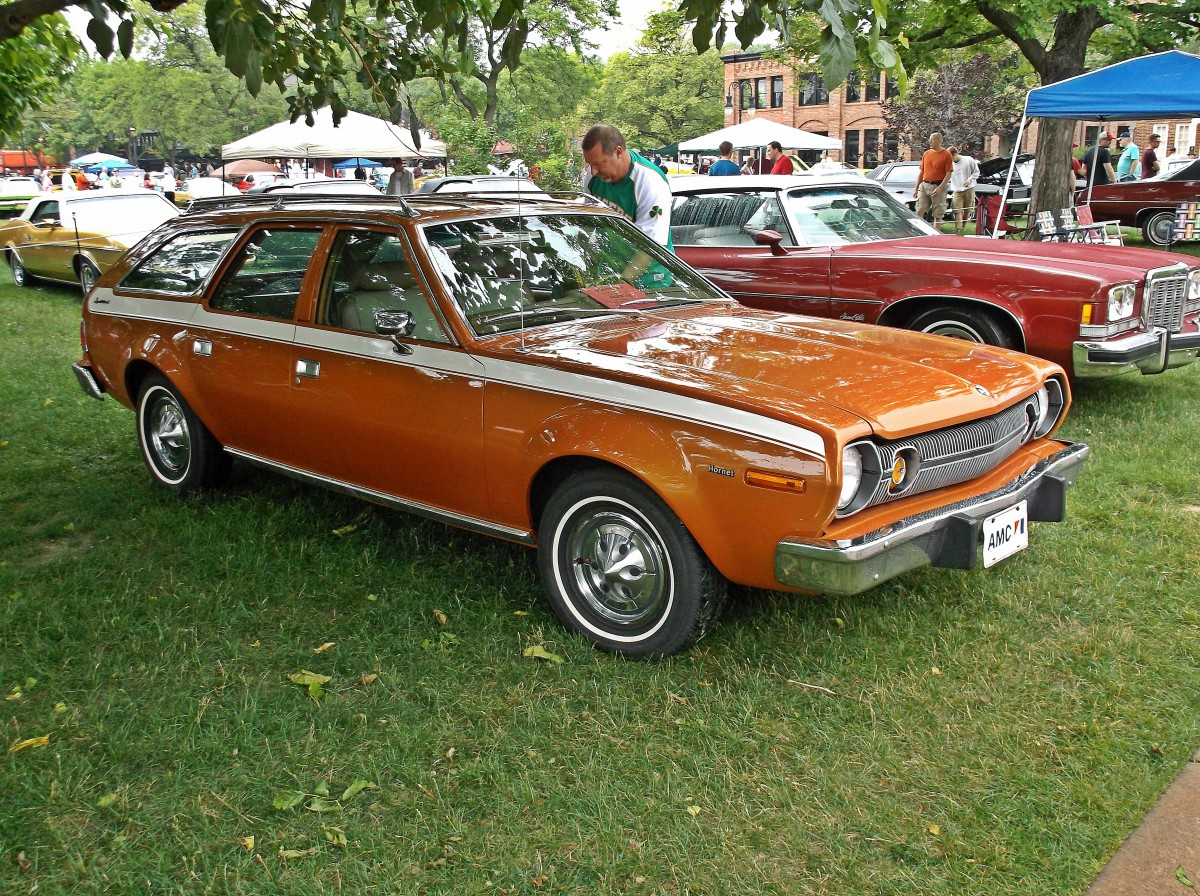

In [43]:
# copy car url string (without quotes), and paste into a new browser tab to see the car picture
amc_hornet_car_url = "https://i0.wp.com/www.curbsideclassic.com/wp-content/uploads/2015/06/006a.jpg"

# 
# display the image of the AMC Hornet Sportabout: you do not need the image in your local folder--just load it from the website url

# L@@K: Sweet ride! But the pic is too big; set the width in 
Image(amc_hornet_car_url)

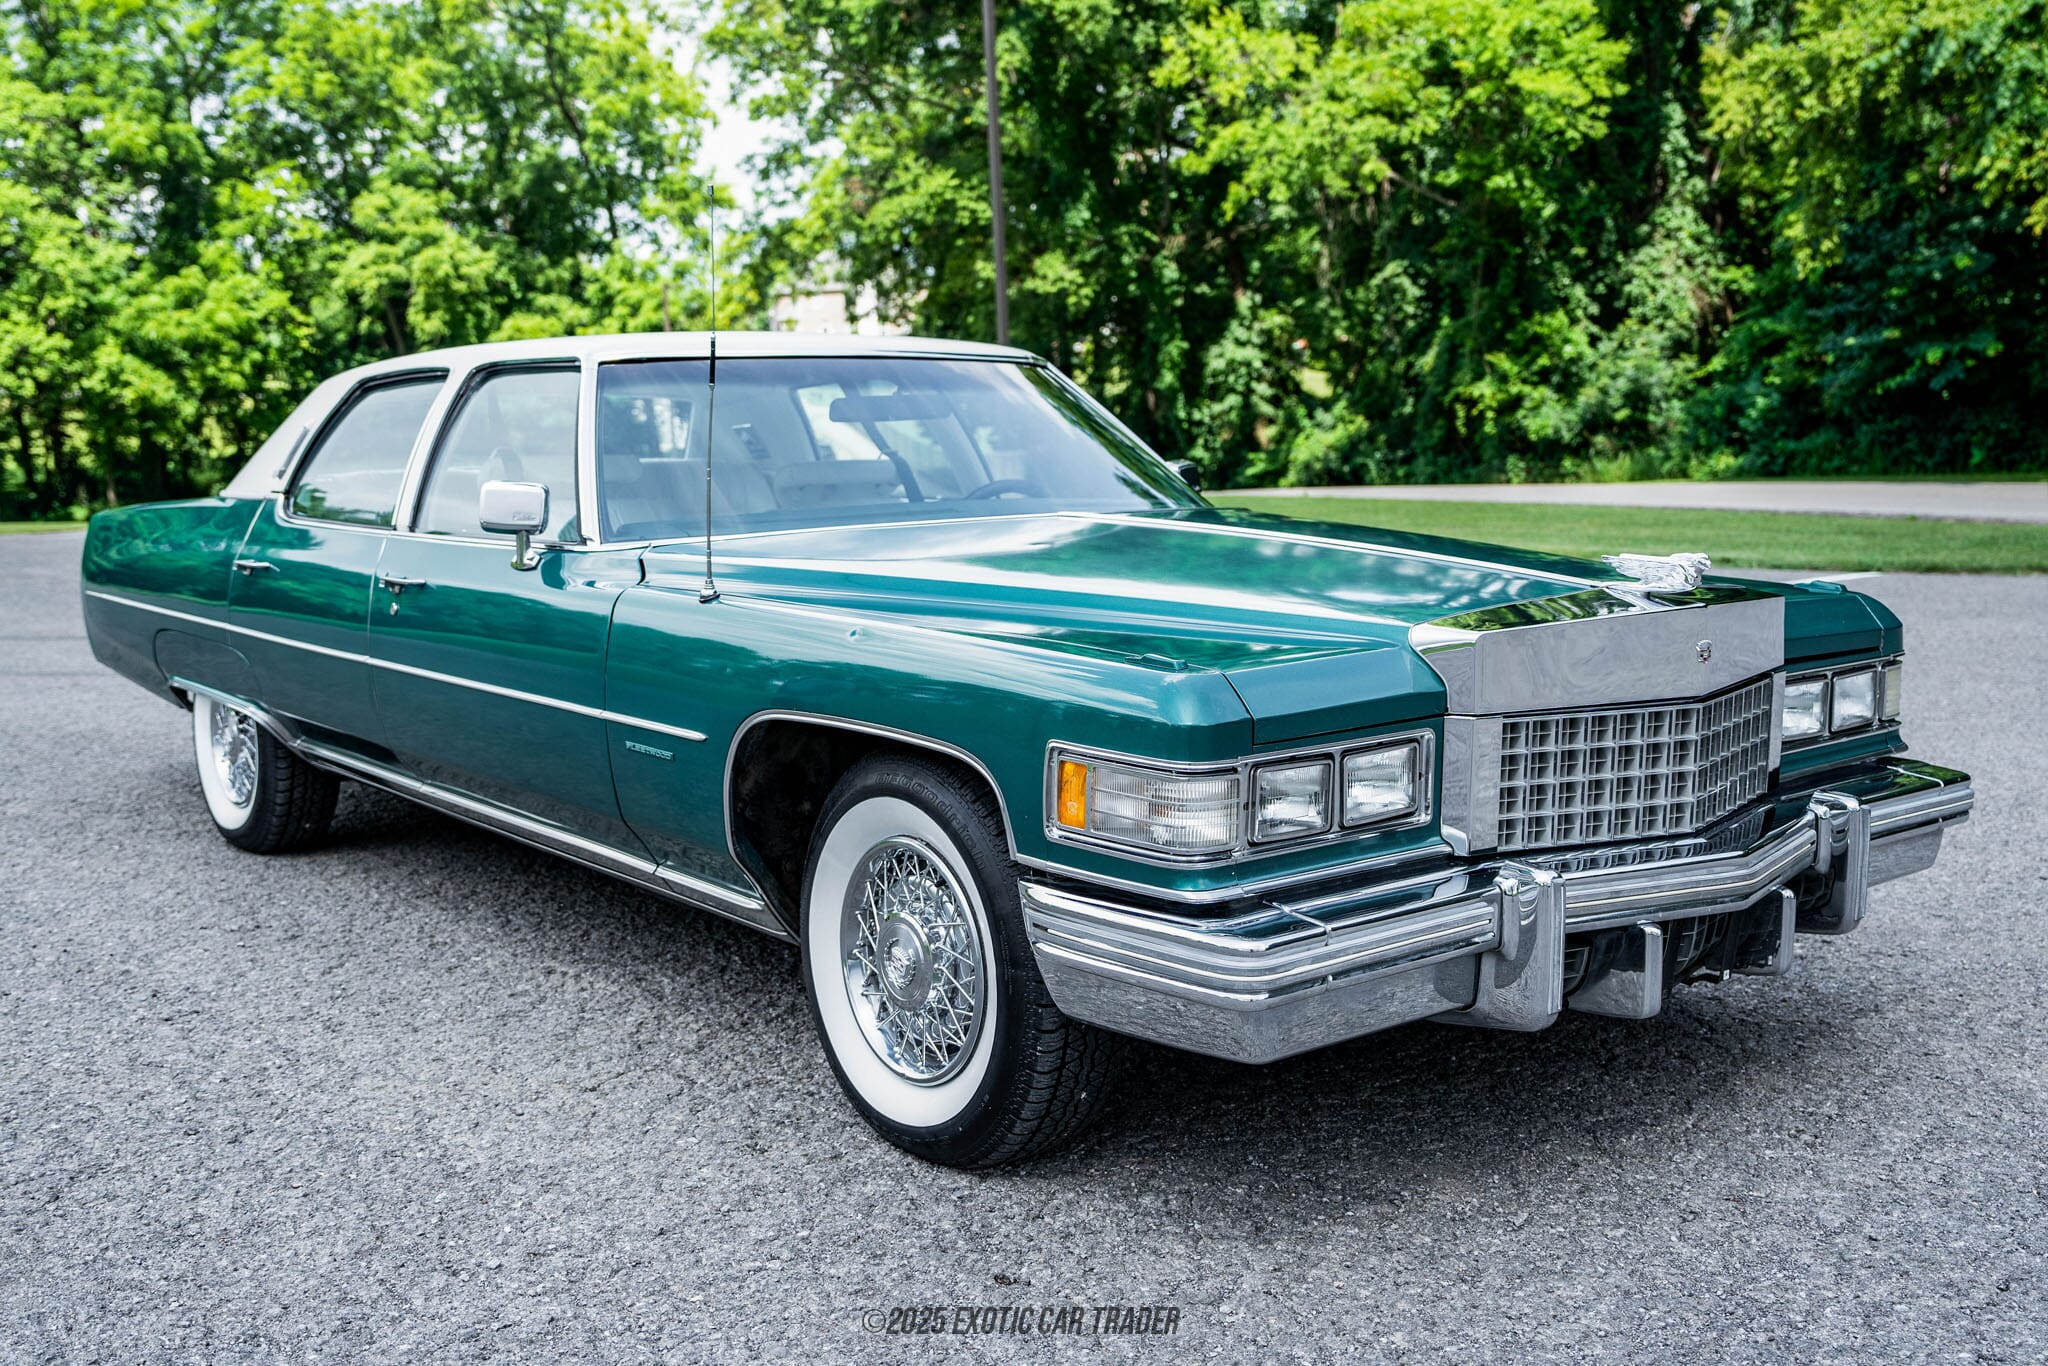

In [44]:
# load the Caddy pic
caddy_pic_url = "https://media.carlisty.com//For%20Sale%20PICTURES/2025/250737321/1976-Cadillac-Fleetwood-Sixty-Special-Edition-Greenbrier-Firemist-Metallic-6B69S6Q288702_010.jpg"
Image(caddy_pic_url)

In [45]:
# load the mtcars csv file, saving the resulting DataFrame as cars_df
# index_col=0 preserves the named index, otherwise it becomes first col at index 0
# df = pd.read_csv(csv_url)
# index_col=0 -- prevents the index name from becoming a column
# cars_df = pd.read_csv('../csv/mtcars.csv', index_col=0)
cars_df = pd.read_csv('../csv/mtcars.csv')
# cars_df = pd.read_csv('../csv/mtcars.csv')
# without index_col=0, the index if named, becomes a new column called "Unnamed: 0" (which of course you can change)

In [46]:
# output the shape of cars_df, followed by the cars_df
# there are only 32 rows, so all will display
print(cars_df.shape) # (32, 11)
cars_df

(32, 12)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [47]:
# call the describe() method to see the statistical report on the numeric columns:
cars_df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [48]:
# call the info() metho to see the data types of each column,
# and if there any null values indicating missing data
# 'object' refers to string data; float/int are numeric data
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


**df.isna()** prints the dataframe with True in any cell that is missing data; False in fields that have data.

**df.isna().sum()** prints the total number of instances of missing data per column



In [49]:
# call the isna() method.
# chain .sum() after isna() this reports the number of null values per column
cars_df.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

**renaming column**

**rename()** method has a **columns** parameter,
the value of which is a **dictionary**  
of one or more **keys**, as **{"old_col_name":"new_col_name"}**

In [50]:
# change the column name "Unnamed: 0" to "car"
cars_df.rename(columns={"Unnamed: 0":"car"},inplace=True)

In [51]:
cars_df

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


**assigning "make" and "model" to separate columns**
**"car"** column data should be assigned to separate columns.  

We will proceed as follows:
- **split()** method to make a list of make and model words, such as **['Mazda', 'RX4', 'Wag']**.  
- the first item in the list (at index 0) would be assigned to the **make** column
- **join()** method to combine the rest of the list into a string for assignment to the **model** column.

**review of split() and join() methods**.

**split()**
- **split()** is called on a string and returns a list of items.  
- **split()** takes a string argument called the **delimiter**, which specifies the character(s) where the split will occur.  
- if the delimiter is omitted, splitting defaults to the space, which would split a string of words, such as a car makea and model name or a sentence into a list of individual words

**join()**
- **join()** is called on a **delimiter** and takes a list as its argument
- **join()** returns a string of list items, joined together by the delimiter.
- **new_str = " ".join(list)** returns a string where each **list** item is a separate word:

In [52]:
# before tackling the "car" column,
# lets warm up with a couple of split() / join() examples:

# get rid of the file extension and split the remaining string into a list of words
file_name = 'cat-refuses-to-play-with-floppy-fish.jpg'

# index() review: get the index of the dot ('.'), then select from the beginning to
# to the index of the dot; this eliminates the file extension
# or split on the dot and then get rid of item at index -1 (jpg)
file_name_words_list = file_name.split(".")
print('file_name_words_list:',file_name_words_list)
no_ext_file_name = file_name_words_list[0]
print('no_ext_file_name:',no_ext_file_name)
# cat-refuses-to-play-with-floppy-fish

# split the no-extension file name into a list of individual words
# L@@K: ['cat-refuses-to-play-with-floppy-fish']
# since there are no spaces and no delimiter specified, we get a one-item list
# try again, this time splitting on the hyphen '-'
words_list = no_ext_file_name.split('-')
print('words_list:',words_list)

file_name_words_list: ['cat-refuses-to-play-with-floppy-fish', 'jpg']
no_ext_file_name: cat-refuses-to-play-with-floppy-fish
words_list: ['cat', 'refuses', 'to', 'play', 'with', 'floppy', 'fish']


In [53]:
# split "Mazda RX4 Wag", into a list. This is one of the actual car names.
# don't include a delimiter, so that it defaults to splitting on the spaces
car = "Mazda RX4 Wag"
car_words_list = car.split()
print('car_words_list:',car_words_list) # ['Mazda', 'RX4', 'Wag']

# get the car make by saving the first list item to a string variable:
make = car_words_list[0]
print('make:',make) # 'Mazda'

# select from the 2nd item to the end; if this is just one item
# then model will be a string; else model will be a list
model_list = car_words_list[1:]
print('model_list:',model_list) # ['RX4', 'Wag']

# join the model into a string
model = " ".join(model_list)
print('model:',model) # RX4 Wag

car_words_list: ['Mazda', 'RX4', 'Wag']
make: Mazda
model_list: ['RX4', 'Wag']
model: RX4 Wag


**combining steps:** we can also get the make and model by combining steps; we actually need this approach when using **apply(lambda)** on a column, because as an inline, anonymous function, a lambda function really needs to be a one-liner

In [54]:
# get the make and model by combining steps:
car = "Ford Pantera L"
# get the make string in one line of code
 # (split and then get the string from the list)
make = car.split()[0]
print('make:',make) # Ford

model = " ".join(car.split()[1:])
print('model:',model) # Pantera L

make: Ford
model: Pantera L


In [55]:
cars_df

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


**df['car'].apply(lambda)**
The **apply()** method is called on a Data Frame column and takes a **lambda** function as its argument.
- the function is called on each value of the column, row by row.
- the syntax is: **lambda input : output**
- **input** is the column value for the current row
- **output** is the return value, resulting from some operation performed on the input
- the return value is assigned as the new column value.
- we will do a quick review / example of how **lambda** functions work
- then, we will call **apply(lambda)** on the **make and model** column
- we will do this twice: once for the **make** column, and once for the **model** colunm

**lambda input : output** review example
- declare a var called **cube_num**, set equal to a **lambda**
- **cube_num** becomes a function since it is set equal to one
- the lambda takes as its **input** the **argument** passed to the function when it is called
- the input is to the left of the **colon :**
- to the right of the **colon :** is the operation that is performed on the input
- the result of the operation, in this case, cubing the number, is the lambda's **return value**
- the function call resolves to / equals the **return value**

In [56]:
# lambda input : output
# declare a var called cube_num, set equal to a lambda
# cube_num becomes a function since it is set equal to one
# the lambda takes the input argument when the function is called
# the input is to the left of the colon
# to the right of the colon is the operation that is performed on the input
# the result of the operation, in this case, cubing the number, is returned
# the function call resolves to the return value


# call the function, saving the return value (the cube of the input) to a var

# 64 (4 x 4 x 4)

# call the function again with a different input argument

print('5 ** 3 =') # 125 (5 x 5 x 5)

5 ** 3 =


**making individual "make" and "model" columns**
- the value of each column will be the result of a **lambda function**
- the lambda will peform the **split() / join()** operations as demonstrated, above

**making the "make" column: split() method**

In [57]:
# declare a "make" column, set equal to the "car" column:
# call the apply() method on the "car" column, passing it a lambda,
# the lambda's input is the current car string, as c: "Mazda RX4 Wag"

# the lambda function peforms the split()[0] operation, detailed earlier and returns the result, which is saved as the value of the "make" column
cars_df['make'] = cars_df['car'].apply(lambda c : c.split()[0])
# L@@K: it worked! we got the car make all by itself in a new "make" column

In [58]:
cars_df

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,make
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Merc


**making the "model" column: join(),  split() methods combined**

In [59]:
# the model consists of everything but the first word of make and model.
# the lambda function calls the split() method on the current car name, as c
# then, the list slice, from index 1 to the end, is passed to the join() method,
# join() is called on the " " delimiter, so that the list items are joined by a space
cars_df['model'] = cars_df['car'].apply(lambda c : " ".join(c.split()[1:]))

# L@@K: it worked! we got the car model all by itself in a new "model" column

In [60]:
cars_df

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,make,model
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda,RX4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda,RX4 Wag
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun,710
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet,4 Drive
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet,Sportabout
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant,
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,Duster,360
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc,240D
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc,230
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Merc,280


**drop()** method for deleting column
Now that the car **make** and **model** names are in their own, separate columns,  
- let's use the **drop()** method to eliminate the **car** column.  

- **inplace=True** "stamps the change" right onto the existing data frame.
This way, we don't have to save the entire operation back to itself.  
- **axis=1** property specifies that we remove the vertical column (axis 1) without affecting the horizontal rows (axis 0).

In [61]:
# drop() the redundant "make and model" column:
# cars_

In [62]:
# cars_

**moving columns:**
- the new **make** and **model** columns are at the right side.  
Let's move them to the left so that they are the first two columns

- **col_series = df.pop('col_name')** method removes and returns the last column as a series.
- **pop(col_name)** method removes and returns the specified column.
- **pop()** must be set equal to a variable in order to capture the popped column
- **insert()** method adds a column at the specified index, with 0 being the first column  position.
- **insert()** takes 3 arguments: index, name of new column, column data.


In [63]:
# move the "make" and "model" columns to the left side as the first 2 columns

# pop the "make" column, and save it as a variable:
make_series = cars_df.pop('make')

# pop the "model" column, and save it as a variable:
model_series = cars_df.pop('model')

In [64]:
cars_df

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [65]:
# insert a new "model" column at index 0 
# (or 1 if you kept the 'car' col), providing it the popped make column data:
cars_df.insert(1,'model',model_series)

In [66]:
cars_df

,car,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [67]:
# insert a new "make" column at index 1, providing it the popped model column data:
cars_df.insert(1,'make',make_series)

In [68]:
cars_df

,car,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,Mazda,RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,Mazda,RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,Datsun,710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,Hornet,4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,Hornet,Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,Valiant,,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,Duster,360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,Merc,240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,Merc,230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,Merc,280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [69]:
# car

# L@@K: it worked! the make and model columns are now at the left side

**rearrange all the columns: keep "make" and "model" at the beginning,  
but put the other columns in alphabetical order**
- let's keep **make** and **model** as the first two columns, but alphabetize the rest
- get all but the first 2 columns into a list
- **df.columns.tolist()** returns a list of all column names
- **df.columns.tolist()[2:]** returns a list of all but first 2 column names
- **sort()** the list of all but first 2 column names
- **insert()** **"make"** and **"model"** at the beginning of the list
- pass the list to the **reindex(columns=list)** method

In [70]:
# get the first 2 cols ('make' and 'model') into a list
# mm_

# get all but first 2 cols into a list and sort it from A-Z:
# other_

# add the alphabetized list to end of make and model list:

print('mm_cols_list:')
# ['make', 'model', 'am', 'carb', 'cyl', 'disp', 'drat', 'gear', 'hp', 'mpg', 'qsec', 'vs', 'wt']

mm_cols_list:


**df.reindex(columns_list)** reorders the columns based on the list passed to the reindex method

In [71]:
# reindex the columns using the cols_list
# cars_

# L@@K: "make" and "model" are still the first 2 columns, but the rest are in alphabetical order

In [72]:
cars_df

,car,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,Mazda,RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,Mazda,RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,Datsun,710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,Hornet,4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,Hornet,Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,Valiant,,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,Duster,360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,Merc,240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,Merc,230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,Merc,280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [73]:
# cars_df

**groupby()** method is called on a data frame and takes a string column as its argument.
- it returns a new data frame of aggregated data for each column unique name value, or group.
- each group has the numeric columns as its properties.
- these properties come with statistical methods for aggregating the data.
- the resulting data frame has one columns, the numeric data, with the index (row names) being the group name.
- this data can be charted on x, y axes to make, for example bar and column charts.

In [74]:
# group the "make" column, and get the average mpg for each group.
# the resulting data frame has two columns: make and mpg.

# declare a new dataframe, set equal to a new DataFrame declaration:
# pass the DataFrame() method the groupby expression on 'make', getting the mean mpg


# sort the result by mpg in descending order


# print(avg_mpg_by_make_df.shape, type(avg_mpg_by_make_df)) # (22,1) <class 'pandas.core.series.Series'>


In [75]:
# get just the top 10 highest-mpg car groups:
print("\nTop 10 Makes by MPG:\n")



Top 10 Makes by MPG:



**using Pandas itself to make a bar chart (rather than Matplotlib)**
- **df.plot(kind="bar")** methods is called on a data frame and outputs a chart with vertical bars.
- **plt.bar(x, y)** is the Matplotlib version of bar
- use **kind="barh"** to get horizontal bars
- set **df.plot(kind="barh")** equal to a var, **ax**
- **ax** can be looped to label the individual bars with their numberic values

In [76]:
# make a horizontal bar chart from top_10_makes_by_mpg,
# use of vertical bars make car name axes hard to read
# set the df.plot(kind="bar") equal to a var called ax (axis)
# the reason for this is to be able to label the individual
# bars w their numeric values

# plt.xticks(rotation=45)
# 'cornflowerblue'

# label the chart
# "Top 10 Car Makes by MPG"
# labelling the x and y axis may be unnecessary, since the
# y axis is clearly the names of cars and the x axis
# is explained by the mpg legend
# "Avg Miles Per Gallon"
# '--'

# set the xlim to give the bar number labels room to display
# without overlapping the right border of the chart


# move the legend to the lower right
 # 'best' is used by default
# legend positioning options esides default 'best''
# 'upper right' 'center right' 'lower right'
# 'upper left' 'center left' 'lower left'
# 'center left' 'center center' 'center right'
# loop the ax var so that we can label the bars w their numeric values


The **df['col name'].hist()** method is called on a data frame column of numeric values and outputs a **histogram**,  
which is a set of columns, called **bins**, which show frequency distribution of values.  
The columns represent how many items are in that range.

In [77]:
# make a histogram of horsepower (hp) for the cars_df.


# add a title and x and y labels. Set font color and size.
#     End with the show() method to remove unwanted text from above the chart:
# "Frequency Distribution of Cars by Horsepower"
# "Horsepower"
# "Number of Cars"

# L@@K: there is an outlier at far right -- it's the 335-hp Maserati

- **plot()** method charts a line on an (x, y) axis.
- **scatter()** places individual dots on an (x, y) axis.
- get the desired numeric column data from the data frame into lists of numbers.
- **df['col'].tolist()** called on a data frame column, returns a list.
- **list(df['col'])** method also returns a list

In [78]:
# make a list from the wt column, using tolist():tolist()

print('mpg_list:') # [2.62, 2.875, 2.32, etc. ]

# make a list from the hp column by passing it to the list() method:

print('hp_list:') # [110, 110, 93, etc. ]

mpg_list:
hp_list:


**positive** and **negative** correlation
A scatter plot can reveal much about the relationship betwen the two variables.
- if the dots are scattered more or less all over, then there is not a strong correlation between the two
- there is a strong negative correlation between a car's horsepower and its gas mileage.
- positive correlations result in a positively (upward) sloping line
- negative correlation produces a negative (downward) sloping line

In [79]:
# make a scatter plot showing horsepwer vs mpg.
# this will produce a strong negative correlation, with dots trending downward
# this is because cars with high horsepower tend to guzzle gas

# plot the mpg_list and hp_list as scatter plot dots,
# with mpg for the x-axis and hp for the y-axis


# add a title and x and y labels
# "Cars MPG vs. Horsepower"
# "Miles Per Gallon"
# "Horsepower"



**linear regression** refers to a line being drawn through a bunch of dots in a scatter plot
- the **regression line** is that line which minimizes the distance from the line to the dots
- **least square distance sum** refers to the regression line being plotted such that it  
minimizes the sum of the squares of the distances from all the dots to the line
- **np.polyfit()** method is used to produce the regession line
- **np.polyfit(x,y,1)** takes the x and y lists as args and returns **m** and **b**,  
the slope and y-intercept, respectively of the regression line; 1 indicates the number of slope directions
- **y = m * x + b** is the geometric formula for the y position in terms of **m** (slope of the lin)  
times the x value plus the **b** (y-intercept)

In [80]:

# add a title and x and y labels
# "Cars MPG vs. Horsepower with Linear Regression"
# "Miles Per Gallon"
# "Horsepower"

# plot regression line:
# call the np.polyfit() method, passing it the 2 lists
# the method returns m (slope) and b (y-intercept)
# this provides all the values for the formula y = m * x + b


# plot the line providing the y value in terms of x, m and b
# m * cars_df['mpg'] + b
# where x is the whole column series -- not the list version
# this gives us a least squares distance / regression line
# y = m * x + b

